In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import re
import io
import matplotlib.pylab as plt
from fa2 import ForceAtlas2
import json
import ast
from collections import Counter
import pickle

In [2]:
g = nx.read_gpickle("all_actors_graph.gpickle")

In [3]:
print('number of actors in network:', g.number_of_nodes())

number of actors in network: 61278


In [4]:
print('number of edges in network:', g.number_of_edges())

number of edges in network: 2517315


In [5]:
degrees = g.degree()
list_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

In [6]:
print('Top actors: ')
for index, actor in enumerate(list_degrees[:10], start = 1):
    print(str(index) + '. ' + actor[0] + ': ' + str(actor[1]) + ' different actors')

Top actors: 
1. Samuel L. Jackson: 2086 different actors
2. Morgan Freeman: 1806 different actors
3. Stan Lee: 1669 different actors
4. Robert De Niro: 1587 different actors
5. Matt Damon: 1555 different actors
6. Liam Neeson: 1528 different actors
7. Bruce Willis: 1499 different actors
8. Michael Caine: 1479 different actors
9. John Goodman: 1372 different actors
10. Johnny Depp: 1368 different actors


In [7]:
degree_over_500 = len([x for x in list_degrees if  x[1] > 500])
print(str(degree_over_500) + ' actors acted with over 500 other actors')

576 actors acted with over 500 other actors


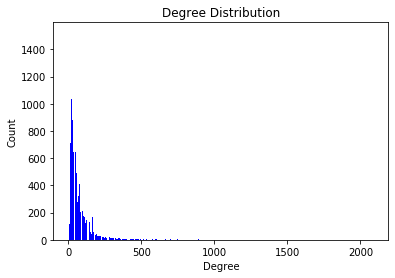

In [8]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

In [9]:
gc = max(nx.connected_components(g), key=len)
print('size of giant component:', len(gc))

connected_components = (sorted(nx.connected_components(g), key=len))
print('\nsize of all connected componenets')
print([len(x) for x in connected_components])

size of giant component: 61044

size of all connected componenets
[1, 2, 2, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 8, 9, 11, 11, 11, 12, 13, 13, 14, 15, 18, 19, 26, 61044]


### Creating graph only with high degree nodes

In [10]:
Gc = max(nx.connected_component_subgraphs(g), key=len)
nodes_degree_over_500 = ([node for node in Gc.degree() if node[1]>500])
new_graph = nx.subgraph(Gc, nodes_degree_over_500)

node_degree_dict = nx.degree(Gc)
##Graph with nodes with degree over 600
new_graph = nx.subgraph(Gc,[x for x in Gc.nodes() if node_degree_dict[x]>600])

In [11]:
print('Number of nodes in graph:', new_graph.number_of_nodes())

Number of nodes in graph: 337


In [12]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [13]:
p = forceatlas2.forceatlas2_networkx_layout(new_graph, pos=None, iterations=5000)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 248.90it/s]


BarnesHut Approximation  took  6.25  seconds
Repulsion forces  took  12.12  seconds
Gravitational forces  took  0.13  seconds
Attraction forces  took  0.67  seconds
AdjustSpeedAndApplyForces step  took  0.46  seconds


D:\Programs\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


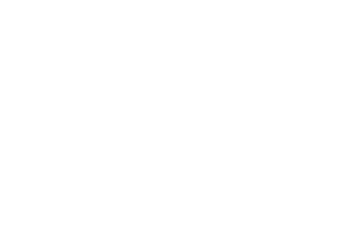

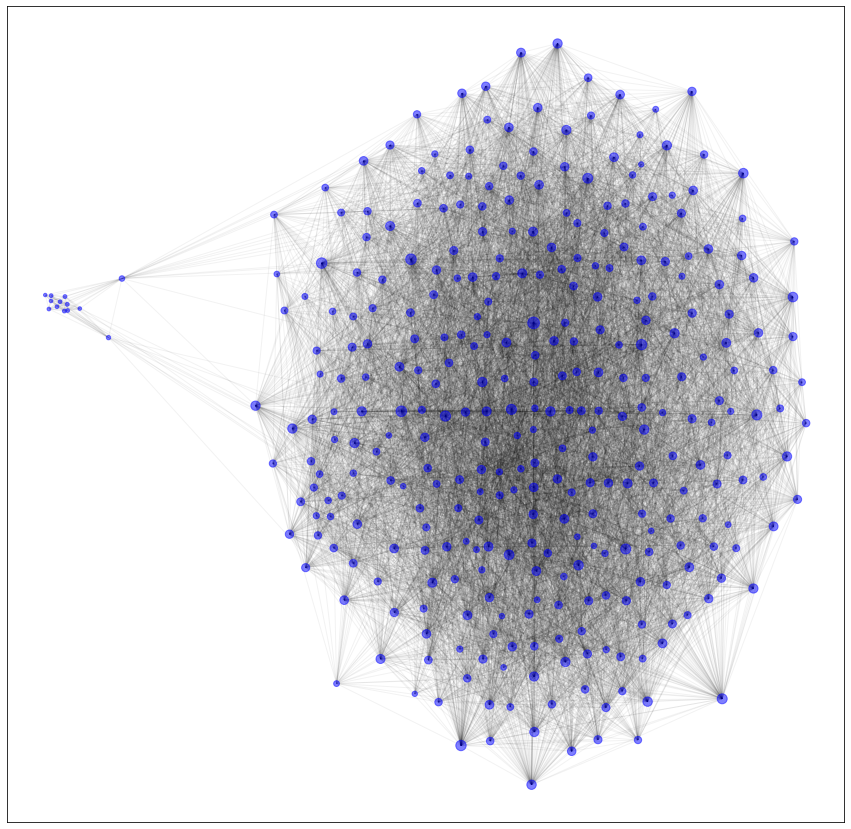

In [14]:
d = dict(new_graph.degree)
degrees = [(d[node]) for node in new_graph.nodes()]
plt.axis('off')
plt.figure(figsize=(15,15)) 
nx.draw_networkx_nodes(new_graph, p ,node_color='blue', node_size= degrees, with_labels=False, alpha=0.5)
nx.draw_networkx_edges(new_graph, p, alpha=0.05)
plt.savefig('demo.png', transparent=True)
plt.show()

### Network only including actors who appeared in at least two movies

In [15]:
g = nx.read_gpickle("actors_graph.gpickle")

In [16]:
print('number of actors in network:', g.number_of_nodes())

number of actors in network: 18694


In [17]:
print('number of edges in network:', g.number_of_edges())

number of edges in network: 859402


In [18]:
degrees = g.degree()
list_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

In [19]:
print('Top actors: ')
for index, actor in enumerate(list_degrees[:10], start = 1):
    print(str(index) + '. ' + actor[0] + ': ' + str(actor[1]) + ' different actors')

Top actors: 
1. Samuel L. Jackson: 1301 different actors
2. Morgan Freeman: 1124 different actors
3. Bruce Willis: 1029 different actors
4. Robert De Niro: 994 different actors
5. Liam Neeson: 947 different actors
6. Matt Damon: 913 different actors
7. Stan Lee: 900 different actors
8. Johnny Depp: 881 different actors
9. Stanley Tucci: 873 different actors
10. John Goodman: 867 different actors


In [20]:
degree_over_500 = len([x for x in list_degrees if  x[1] > 500])
print(str(degree_over_500) + ' actors acted with over 500 other actors')

148 actors acted with over 500 other actors


In [21]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

NameError: name 'G' is not defined

In [ ]:
gc= max(nx.connected_component_subgraphs(g), key=len)
gc

In [ ]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [ ]:
# Warning! takes approx. 1 hour to run
positions = forceatlas2.forceatlas2_networkx_layout(gc, pos=None, iterations=5000)

In [ ]:
d = dict(gc.degree)
degrees = [(d[node])/10 for node in gc.nodes()]
plt.axis('off')
plt.figure(figsize=(15,15)) 
nx.draw_networkx_nodes(gc, positions ,node_color='blue', node_size= degrees, with_labels=False, alpha=0.5)
nx.draw_networkx_edges(gc, positions, alpha=0.05)
plt.show()